In [12]:
import pandas as pd
import numpy as np
import sigfig
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
plt.rcParams.update(mpl.rcParamsDefault)

def rd(valor, error):
    return eval('("' + sigfig.round(valor, error, cutoff=19, sep ='","') + '")')


def tex(panda, columnas):
    l = len(panda)
    a = len(columnas)
    print('\\begin{array}{|' + 'l|'*a + '} \\hline')
    for fila in range(l):
        s = ''
        for col in columnas:
            s+= str(panda[col][fila]) + ' & '
        print(s[0: -2] + ' \\\\ \\hline')
    print('\\end{array}')

def regresion(x, y):
    n = len(x)
    xc = x.sum()/n
    yc = y.sum()/n
    sx = math.sqrt(((x**2).sum()/n)-xc**2)
    sy = math.sqrt(((y**2).sum()/n)-yc**2)
    sxy = ((x*y).sum()/n)-xc*yc
    r = sxy/(sx*sy)
    m = sxy/(sx**2)
    b = yc - m*xc
    em = (sy/sx)*math.sqrt((1-r**2)/(n-2))
    eb = em*math.sqrt(sx**2 + xc**2)
    return(m, b, em, eb, r)

In [35]:
datos = pd.read_csv('D:/Latex/UNED/Primer curso/Tecnicas experimentales/agua/Datos/agua.csv', names=['i', 'v', 'm'])
t = 360
et = 0.1
mv = 84.33

In [36]:
tex(datos, ['i', 'v', 'm'])

\begin{array}{|l|l|l|} \hline
1.6 & 143.3 & 111.31  \\ \hline
1.45 & 133.0 & 106.15  \\ \hline
1.28 & 125.4 & 100.78  \\ \hline
1.21 & 117.6 & 97.89  \\ \hline
1.12 & 109.4 & 94.85  \\ \hline
1.0 & 98.8 & 90.97  \\ \hline
0.95 & 94.8 & 89.59  \\ \hline
1.66 & 163.4 & 120.59  \\ \hline
1.73 & 173.9 & 123.34  \\ \hline
1.63 & 167.6 & 119.26  \\ \hline
\end{array}


In [37]:
datos['dm'] = datos['m']-mv
datos['w'] = datos['i']*datos['v']
datos['e'] = datos['w']*mv
datos = np.round(datos, 2)

In [38]:
tex(datos, ['dm', 'w', 'e'])

\begin{array}{|l|l|l|} \hline
26.98 & 229.28 & 19335.18  \\ \hline
21.82 & 192.85 & 16263.04  \\ \hline
16.45 & 160.51 & 13535.98  \\ \hline
13.56 & 142.3 & 11999.82  \\ \hline
10.52 & 122.53 & 10332.79  \\ \hline
6.64 & 98.8 & 8331.8  \\ \hline
5.26 & 90.06 & 7594.76  \\ \hline
36.26 & 271.24 & 22874.01  \\ \hline
39.01 & 300.85 & 25370.43  \\ \hline
34.93 & 273.19 & 23037.94  \\ \hline
\end{array}


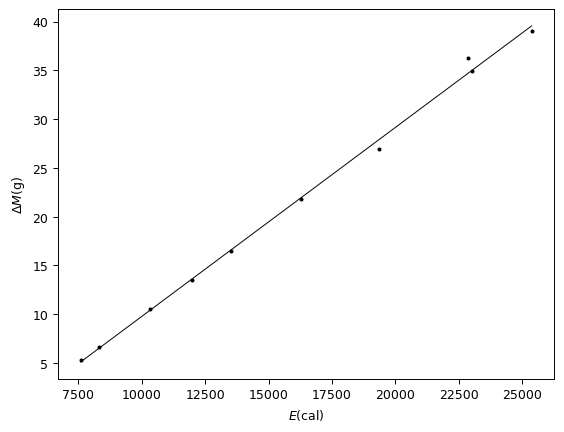

In [39]:
m, n, em, en, r = regresion(datos['e'], datos['dm'])
plt.rcParams.update({'font.size': 9})
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['xtick.major.width'] = 0.7
plt.rcParams['ytick.major.width'] = 0.7
plt.ylabel('$\Delta M$(g)')
plt.xlabel('$E$(cal)')
mm = min(datos['e'])
MM = max(datos['e'])
plt.plot([mm, MM], [m*mm+n, m*MM+n], color='black', linewidth=0.7)
plt.scatter(datos['e'], datos['dm'], s=4, c='black', marker='8')
plt.savefig('D:/Latex/UNED/Primer curso/Tecnicas experimentales/agua/figures/regresión.png', dpi=1000, bbox_inches='tight')
plt.show()

In [40]:
rd(m, em)

('0.00194', '0.00003')

In [41]:
rd(1/m, em/m**2)

('516', '9')